In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import pandas as pd
import numpy.random as random
import matplotlib.pyplot as plt

In [2]:
import keras
print(keras.__version__)
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)


2.0.9


In [3]:
a = 5
b = 3
x = random.random(30) * 5 #random x values [0, 5)
y = a*x + b #+ random.uniform()/100.0 # y is linear in x with some noise in [0, 1/100)

[ 4.92008636  2.4686718   3.97162232  3.71500808  4.06626262  2.40085569
  2.64287343  2.70484245  2.68703147  4.22473378  1.82119886  0.98761114
  2.99143637  3.05834445  0.89625472  1.8034209   3.5142698   0.4309301
  4.70485786  3.91647021  1.65096001  3.331138    4.32511218  2.49344136
  3.77773945  4.3379465   4.02368549  4.15887968  2.92446249  1.21655446]
[ 27.6004318   15.343359    22.85811159  21.57504039  23.33131312
  15.00427844  16.21436715  16.52421223  16.43515737  24.12366889
  12.10599429   7.93805571  17.95718186  18.29172225   7.4812736
  12.01710448  20.57134898   5.15465048  26.52428929  22.58235107
  11.25480007  19.65569     24.62556089  15.46720678  21.88869727
  24.68973252  23.11842745  23.79439839  17.62231243   9.08277231]


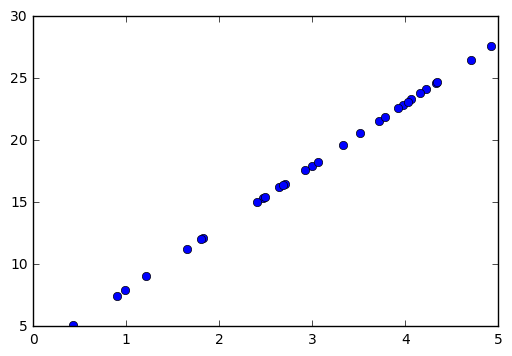

In [4]:
plt.plot(x,y, 'bo')
print(x)
print(y)

In [35]:
linearModel = Sequential()
#Dense default parameters: activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros'
linearModel.add(Dense(1, input_shape=(1,), kernel_initializer='ones')) 
#Default SGD parameters: keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
#SGD converges much much faster than rmsprop when deal with linear neural network
linearModel.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])
linearModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [36]:
linearModel.fit(x,y, batch_size=1, epochs=10, shuffle=False) #Default: shuffle=True

Epoch 1/10
30/30 [==============================] - 0s 920us/step - loss: 23.2101 - acc: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 0s 917us/step - loss: 0.4081 - acc: 0.0000e+00
Epoch 3/10
30/30 [==============================] - 0s 919us/step - loss: 0.3510 - acc: 0.0000e+00
Epoch 4/10
30/30 [==============================] - 0s 911us/step - loss: 0.3017 - acc: 0.0000e+00
Epoch 5/10
30/30 [==============================] - 0s 901us/step - loss: 0.2593 - acc: 0.0000e+00
Epoch 6/10
30/30 [==============================] - 0s 901us/step - loss: 0.2229 - acc: 0.0000e+00
Epoch 7/10
30/30 [==============================] - 0s 906us/step - loss: 0.1916 - acc: 0.0000e+00
Epoch 8/10
30/30 [==============================] - 0s 909us/step - loss: 0.1647 - acc: 0.0000e+00
Epoch 9/10
30/30 [==============================] - 0s 932us/step - loss: 0.1416 - acc: 0.0000e+00
Epoch 10/10
30/30 [==============================] - 0s 921us/step - loss: 0.1217 - acc: 0.0000e+00


In [13]:
linearModel.evaluate(x,y)

1/1 [==============================] - 0s 1ms/step


[3.637978807091713e-12, 0.0]

In [37]:
linearModel.get_weights()

[array([[ 5.25220108]], dtype=float32), array([ 2.12495971], dtype=float32)]

In [114]:
t = random.randint(0,20,8)
print('t = %s'%t)
linearModel.predict(t)

t = [18  5 14  9 10  0 17 14]


array([[ 93.00907898],
       [ 28.00906754],
       [ 73.00907898],
       [ 48.00907135],
       [ 53.00907516],
       [  3.00905991],
       [ 88.00907898],
       [ 73.00907898]], dtype=float32)

In [132]:
linearModel.__dict__
dir(linearModel)

{'_flattened_layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 '_output_mask_cache': {'139912258949456_139913702890320': None},
 '_output_shape_cache': {},
 '_output_tensor_cache': {},
 'built': True,
 'container_nodes': {'dense_13_ib-0', 'dense_input_13_ib-0'},
 'inbound_nodes': [<keras.engine.topology.Node at 0x7f3fdc7e9b50>],
 'input_layers': [<keras.engine.topology.InputLayer at 0x7f3fdc7e90d0>],
 'input_layers_node_indices': [0],
 'input_layers_tensor_indices': [0],
 'input_names': ['dense_input_13'],
 'inputs': [dense_input_13],
 'layers': [<keras.layers.core.Dense at 0x7f3fdc7dbe10>],
 'loss': 'mse',
 'loss_weights': None,
 'metrics': ['accuracy'],
 'metrics_names': ['loss', 'acc'],
 'metrics_tensors': [mean],
 'model': <keras.engine.training.Model at 0x7f3fdc7dbfd0>,
 'name': 'sequential_15',
 'nodes_by_depth': {0: [<keras.engine.topology.Node at 0x7f3fdc7e9a90>],
  1: [<keras.engine.topology.Node at 0x7f3fdc7e9290>]},
 'optimizer': <keras.optimizers.SGD at 0x7f3fdc782bd

In [201]:
import keras
print(keras.__version__)

1.1.0


In [150]:
repr(linearModel)

'<keras.models.Sequential object at 0x7f3fdc7dbd90>'

In [191]:
import inspect
len(inspect.getsourcelines(Sequential))

2